In [7]:
import seaborn as sns  # For loading the Titanic dataset
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree model and tree visualization
from sklearn.metrics import classification_report, accuracy_score  # For evaluating the model
import matplotlib.pyplot as plt

In [11]:
# Load the Titanic dataset from seaborn
# This dataset contains information about passengers, including whether they survived or not

titanic = sns.load_dataset('titanic')
print(titanic)

# Drop rows with missing values to simplify processing
# This ensures that the dataset does not have NaN values, which can cause errors in model training
titanic = titanic.dropna()

#Select relevant features for prediction
X = titanic[['pclass', 'age', 'fare', 'sex']]

# Convert categorical 'sex' feature into numerical format
# Male = 0, Female = 1
X['sex'] = X['sex'].map({'male': 0, 'female': 1})

# Define the target variable (whether the passenger survived or not)
y = titanic['survived']


     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

C:\Users\Admin\AppData\Local\Temp\ipykernel_13824\821794814.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].map({'male': 0, 'female': 1})


In [14]:
# Split the dataset into training and testing sets
# 70% of data for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Create a Decision Tree model with a max depth of 3 for simplicity
# Setting random_state ensures reproducibility of results
tree = DecisionTreeClassifier(criterion = "entropy",max_depth=3, random_state=42)

# Train the model using the training data
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [17]:
# Make predictions on the test data
y_pred = tree.predict(X_test)

In [19]:
# Evaluate the model's performance using a classification report
# The report includes precision, recall, and F1-score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.86      0.70        22
           1       0.87      0.61      0.71        33

    accuracy                           0.71        55
   macro avg       0.73      0.73      0.71        55
weighted avg       0.76      0.71      0.71        55



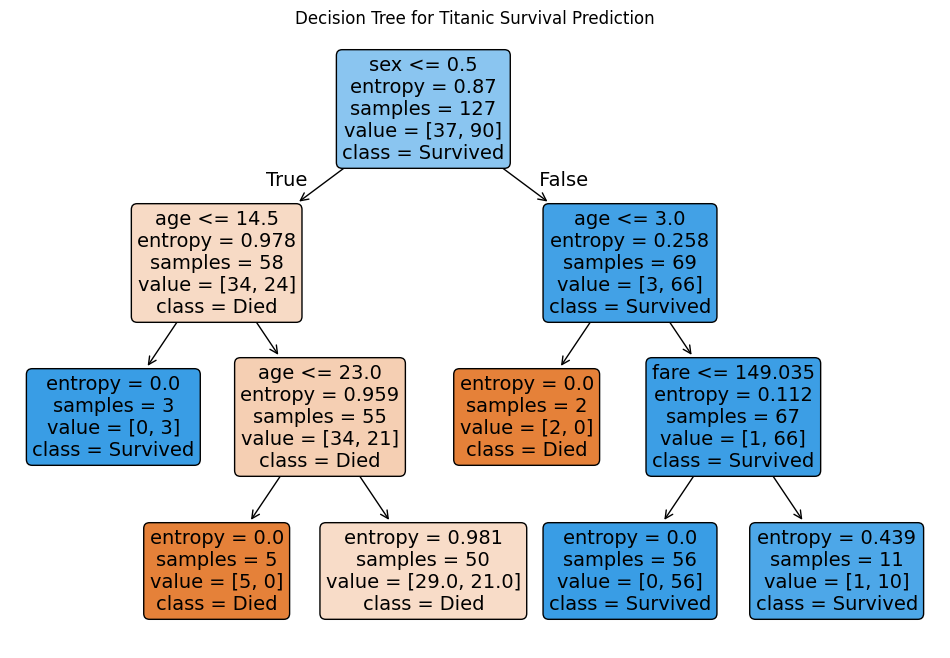

In [20]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=['Died', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree for Titanic Survival Prediction")
plt.show()